<a href="https://colab.research.google.com/github/StathisKratimenos/Colab/blob/main/project_analysis_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import files
uploaded = files.upload()

In [112]:
import pandas as pd

df_renewable = pd.read_json("Renewable_2024.json")
df_load = pd.read_json(r"Fortio_sistimatos.json")
df_balance = pd.read_json(r"Isozigio.json")


print(df_renewable.head())
print(df_load.head())
print(df_balance.head())

df_balance.info()
df_load.info()
df_renewable.info()

                 date  energy_mwh
0 2024-01-01 00:00:00         621
1 2024-01-01 01:00:00         664
2 2024-01-01 02:00:00         745
3 2024-01-01 03:00:00         844
4 2024-01-01 04:00:00         865
   energy_mwh                date
0        4373 2024-01-01 00:00:00
1        4114 2024-01-01 01:00:00
2        3950 2024-01-01 02:00:00
3        3731 2024-01-01 03:00:00
4        3592 2024-01-01 04:00:00
   energy_mwh  percentage                date  \
0       65559    0.493314 2020-11-29 19:00:00   
1       14026    0.105542 2020-11-29 19:00:00   
2       10359    0.077949 2020-11-29 19:00:00   
3       32323    0.243222 2020-11-29 19:00:00   
4      132895    1.000000 2020-11-29 19:00:00   

                                     fuel  
0                                   ΑΕΡΙΟ  
1                                 ΑΙΟΛΙΚΑ  
2  ΚΑΘΑΡΕΣ ΕΙΣΑΓΩΓΕΣ (ΕΙΣΑΓΩΓΕΣ-ΕΞΑΓΩΓΕΣ)  
3                                ΛΙΓΝΙΤΗΣ  
4                                  ΣΥΝΟΛΟ  
<class 'pandas.core.frame.DataFra

In [113]:
# Μετατρέπουμε σε datetime
df_renewable['date'] = pd.to_datetime(df_renewable['date'])
df_load['date'] = pd.to_datetime(df_load['date'])
df_balance['date'] = pd.to_datetime(df_balance['date'])

In [114]:
# Φτιάχνουμε wide μορφή (pivot)
df_balance_pivot = df_balance.pivot(index='date', columns='fuel', values='energy_mwh').reset_index()
df_balance_pivot.columns.name = None  # Καθαρίζουμε το όνομα του index
df_balance_pivot

,date,ΑΕΡΙΟ,ΑΙΟΛΙΚΑ,ΑΠΕ,ΚΑΘΑΡΕΣ ΕΙΣΑΓΩΓΕΣ (ΕΙΣΑΓΩΓΕΣ-ΕΞΑΓΩΓΕΣ),ΛΙΓΝΙΤΗΣ,ΣΥΝΟΛΟ,ΥΔΡΟΗΛΕΚΤΡΙΚΑ,ΦΥΣΙΚΟ ΑΕΡΙΟ
0,2020-11-29 19:00:00,65559.0,14026.0,NaN,10359.0,32323.0,132895.0,10628.0,NaN
1,2020-11-30 19:00:00,69816.0,25423.0,NaN,-2280.0,36927.0,142704.0,12818.0,NaN
2,2020-12-01 19:00:00,66126.0,11039.0,NaN,9736.0,38536.0,143824.0,18387.0,NaN
3,2020-12-02 19:00:00,59065.0,18490.0,NaN,10327.0,40669.0,141005.0,12454.0,NaN
4,2020-12-03 19:00:00,59030.0,20697.0,NaN,14607.0,35770.0,137215.0,7111.0,NaN
...,...,...,...,...,...,...,...,...,...
1657,2025-07-18 00:00:00,86997.0,NaN,31114.0,1638.0,17851.0,151032.0,13432.0,NaN
1658,2025-07-19 00:00:00,70910.0,NaN,30034.0,14716.0,7610.0,137071.0,13801.0,NaN
1659,2025-07-20 00:00:00,65448.0,NaN,28299.0,12795.0,7090.0,127322.0,13690.0,NaN
1660,2025-07-21 00:00:00,96213.0,NaN,30261.0,2986.0,9707.0,152920.0,13753.0,NaN


In [115]:
# Συγχώνευση Renewable + Load
df = pd.merge(df_renewable, df_load, on='date', suffixes=('_renewable', '_load'))

# Συγχώνευση με ενεργειακό ισοζύγιο
df = pd.merge(df, df_balance_pivot, on='date', how='left')
df

,date,energy_mwh_renewable,energy_mwh_load,ΑΕΡΙΟ,ΑΙΟΛΙΚΑ,ΑΠΕ,ΚΑΘΑΡΕΣ ΕΙΣΑΓΩΓΕΣ (ΕΙΣΑΓΩΓΕΣ-ΕΞΑΓΩΓΕΣ),ΛΙΓΝΙΤΗΣ,ΣΥΝΟΛΟ,ΥΔΡΟΗΛΕΚΤΡΙΚΑ,ΦΥΣΙΚΟ ΑΕΡΙΟ
0,2024-01-01 00:00:00,621,4373,21218.0,NaN,25423.0,30188.0,8328.0,95064.0,9907.0,NaN
1,2024-01-01 01:00:00,664,4114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01 02:00:00,745,3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01 03:00:00,844,3731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01 04:00:00,865,3592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8227,2024-12-31 19:00:00,611,7240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8228,2024-12-31 20:00:00,714,6923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8229,2024-12-31 21:00:00,661,6205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8230,2024-12-31 22:00:00,540,5415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df['renewables_%_of_load'] = df['energy_mwh_renewable'] / df['energy_mwh_load']


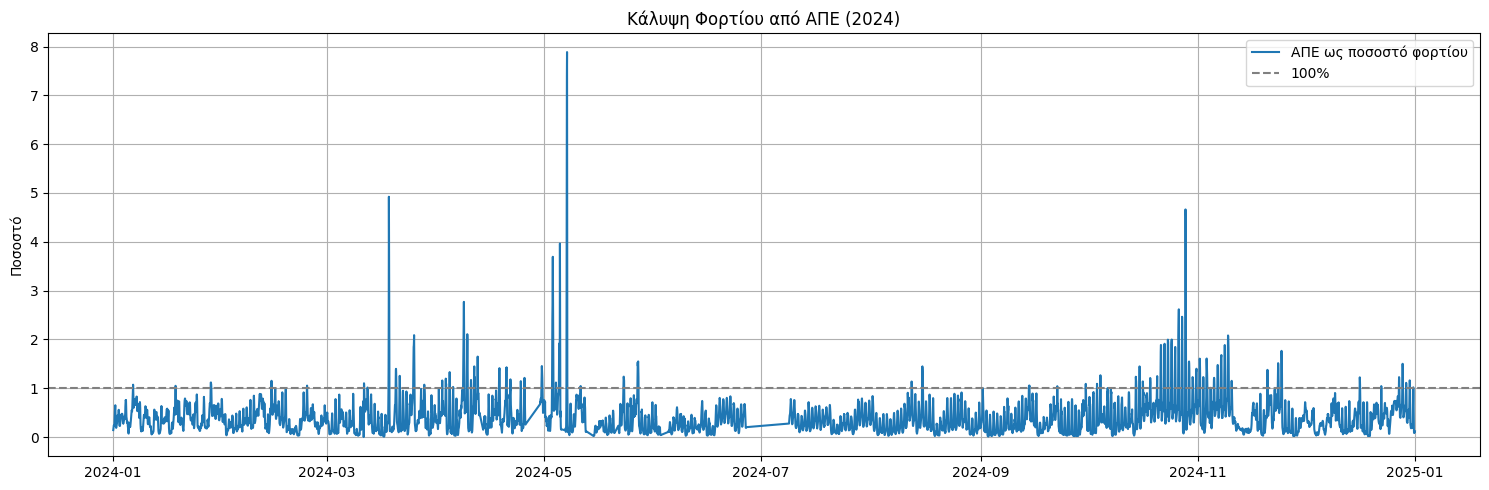

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df['date'], df['renewables_%_of_load'], label='ΑΠΕ ως ποσοστό φορτίου')
plt.axhline(y=1, color='gray', linestyle='--', label='100%')
plt.title("Κάλυψη Φορτίου από ΑΠΕ (2024)")
plt.ylabel("Ποσοστό")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [118]:
df.set_index("date").resample("D").sum()  # Καθημερινή συνολική ενέργεια

df.set_index("date").resample("M").mean()  # Μηνιαία μέση τιμή

/tmp/ipython-input-118-4109501219.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("date").resample("M").mean()  # Μηνιαία μέση τιμή


,energy_mwh_renewable,energy_mwh_load,ΑΕΡΙΟ,ΑΙΟΛΙΚΑ,ΑΠΕ,ΚΑΘΑΡΕΣ ΕΙΣΑΓΩΓΕΣ (ΕΙΣΑΓΩΓΕΣ-ΕΞΑΓΩΓΕΣ),ΛΙΓΝΙΤΗΣ,ΣΥΝΟΛΟ,ΥΔΡΟΗΛΕΚΤΡΙΚΑ,ΦΥΣΙΚΟ ΑΕΡΙΟ,renewables_%_of_load
date,,,,,,,,,,,
2024-01-31,1944.831989,4997.099462,46693.193548,NaN,46675.967742,5133.354839,12685.870968,123272.935484,12084.548387,NaN,0.412380
2024-02-29,1517.517241,4573.640805,41325.482759,NaN,36420.413793,12418.034483,12908.344828,112624.827586,9552.551724,NaN,0.363187
2024-03-31,1179.501344,3891.111559,46768.677419,NaN,28308.032258,3157.225806,9232.548387,96223.193548,8756.709677,NaN,0.376211
2024-04-30,1511.060000,3448.210000,41850.920000,NaN,36265.440000,-8968.760000,7578.680000,85554.680000,8828.400000,NaN,0.525008
2024-05-31,1178.229938,3433.783951,52951.925926,NaN,28277.518519,-5946.851852,1662.444444,85942.333333,8997.296296,NaN,0.459525
2024-06-30,1425.105903,5166.300347,66573.958333,NaN,34202.541667,7134.083333,6918.208333,128178.041667,13349.250000,NaN,0.290488
2024-07-31,1959.105072,6380.009058,79158.043478,NaN,47018.521739,1483.565217,14786.739130,157697.826087,15250.956522,NaN,0.330595
2024-08-31,1436.608871,5250.506720,70114.193548,NaN,34478.612903,3917.387097,9169.967742,130838.419355,13158.258065,NaN,0.316000
2024-09-30,1108.208333,4233.084722,56488.033333,NaN,26597.000000,9290.033333,5329.600000,106642.866667,8938.200000,NaN,0.311012


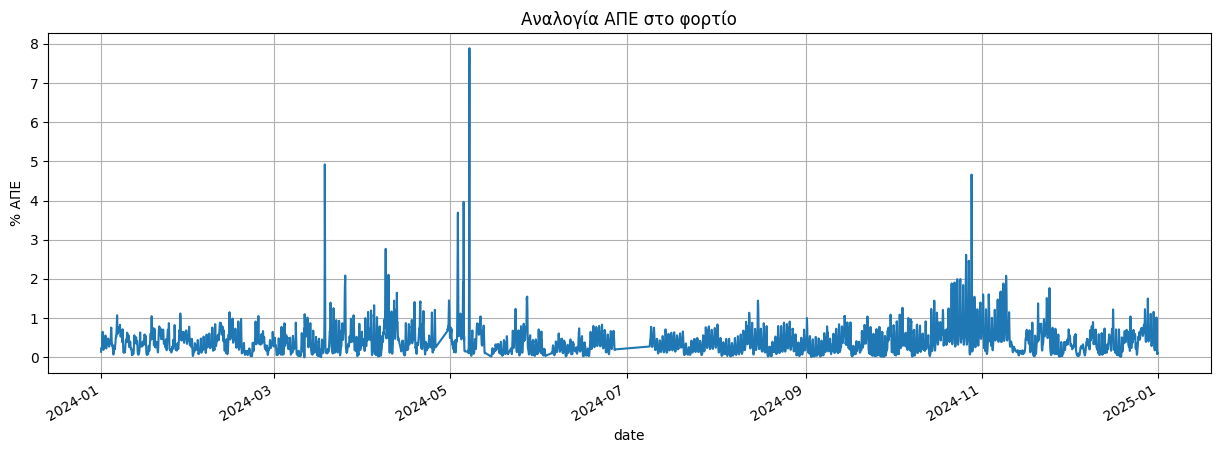

In [119]:
import matplotlib.pyplot as plt

df.set_index("date")["renewables_%_of_load"].plot(figsize=(15,5), title="Αναλογία ΑΠΕ στο φορτίο")
plt.ylabel("% ΑΠΕ")
plt.grid()
plt.show()


In [52]:
#3. Machine Learning προβλέψεις

In [120]:
df["hour"] = df["date"].dt.hour
df["dayofweek"] = df["date"].dt.dayofweek
df["month"] = df["date"].dt.month


In [58]:
# Κατασκευή dataset πρόβλεψης φορτίου
# Δημιουργία συνόλου X (features) και y (στόχος)
# στοχος να προβλέψουμε την τιμή του energy_mwh_load (φορτίο συστήματος) με βάση:

# τις τιμές των ανανεώσιμων (energy_mwh_renewable)
# τα είδη καυσίμου (ΑΙΟΛΙΚΑ, ΑΕΡΙΟ, κ.λπ.)
# την ημερομηνία/ώρα (από date)

In [121]:
features = [
    "energy_mwh_renewable",
    "ΑΙΟΛΙΚΑ", "ΑΕΡΙΟ", "ΛΙΓΝΙΤΗΣ", "ΥΔΡΟΗΛΕΚΤΡΙΚΑ",
    "ΦΥΣΙΚΟ ΑΕΡΙΟ", "ΚΑΘΑΡΕΣ ΕΙΣΑΓΩΓΕΣ (ΕΙΣΑΓΩΓΕΣ-ΕΞΑΓΩΓΕΣ)",
    "hour", "dayofweek", "month"
]

X = df[features]
y = df["energy_mwh_load"]


In [122]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [123]:
# Εκπαίδευση ενός μοντέλου - RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))


MAE: 336.49260248070084
R2 score: 0.8622980109280739


In [ ]:
# MAE ~336 MWh: Κατά μέσο όρο, το μοντέλο "πέφτει έξω" κατά ~336 MWh στην πρόβλεψη του φορτίου. Αν π.χ. το φορτίο είναι 6500 MWh, η πρόβλεψη μπορεί να είναι γύρω στα 6160–6840 MWh.

# R² ≈ 0.86: Το μοντέλο εξηγεί το 86% της διακύμανσης του φορτίου με βάση τις εισόδους (features) .

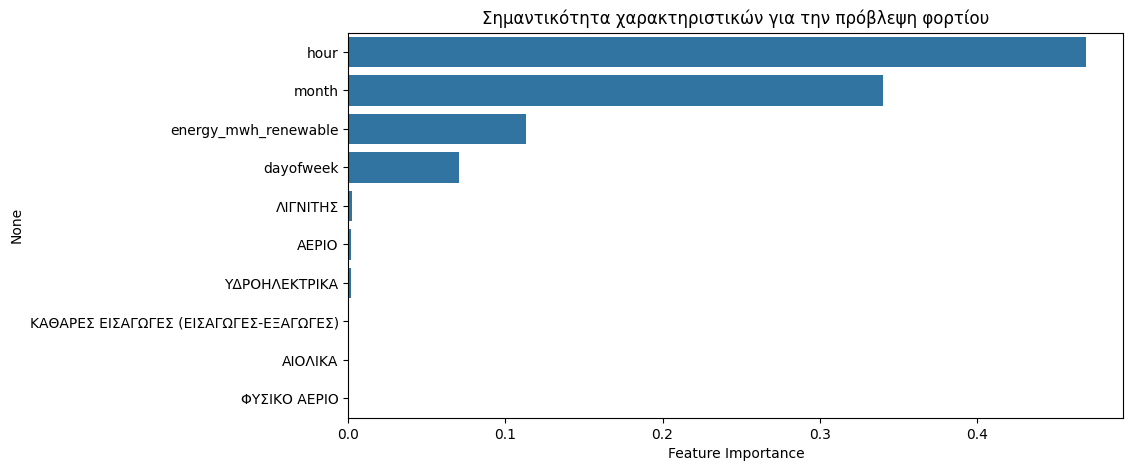

In [124]:
# Ανάλυση σημαντικότητας χαρακτηριστικών (feature importance)
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Σημαντικότητα χαρακτηριστικών για την πρόβλεψη φορτίου")
plt.xlabel("Feature Importance")
plt.show()


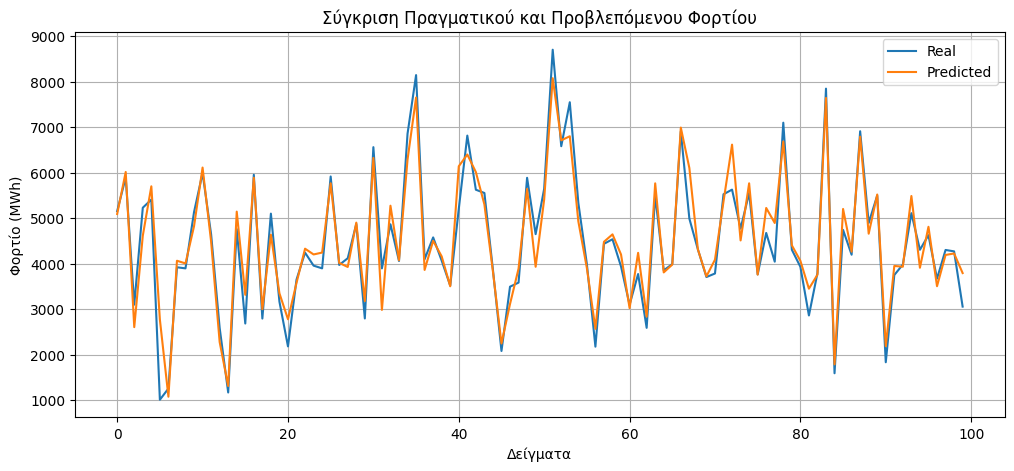

In [125]:
# Γράφημα πραγματικού vs προβλεπόμενου
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Real')
plt.plot(y_pred[:100], label='Predicted')
plt.title("Σύγκριση Πραγματικού και Προβλεπόμενου Φορτίου")
plt.xlabel("Δείγματα")
plt.ylabel("Φορτίο (MWh)")
plt.legend()
plt.grid(True)
plt.show()


In [126]:
# Πρόβλεψη παραγωγής από ΑΠΕ

# Ορισμός Features (X) και Target (y)
y = df["energy_mwh_renewable"]

X = df.drop(columns=["energy_mwh_renewable", "renewables_%_of_load"])
# η στήλη date πρέπει να μετατραπεί σε αριθμητικά features

In [127]:
# Μετατροπή της ημερομηνίας
X["year"] = df["date"].dt.year
X["month"] = df["date"].dt.month
X["day"] = df["date"].dt.day
X["dayofweek"] = df["date"].dt.dayofweek
X = X.drop(columns=["date"])


In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
# Εκπαίδευση Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [130]:
# Αξιολόγηση μοντέλου
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R2 score: {r2}")


MAE: 255.759241044323
R2 score: 0.8400075688083061


In [ ]:
# MAE ≈ 256 MWh: Η μέση απόκλιση της πρόβλεψης είναι περίπου 256 μεγαβατώρες — αποδεκτή τιμή για ημερήσια δεδομένα.

# R² ≈ 0.84: Το μοντέλο εξηγεί το 84% της διακύμανσης στην παραγωγή από ΑΠΕ. Πολύ καλή επίδοση για baseline μοντέλο.

In [131]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Φορτώνουμε το dataset (αν δεν το έχεις ήδη)
#df = pd.read_csv("energy_clean.csv", parse_dates=['date'])

# Δημιουργία νέων χαρακτηριστικών από τη στήλη ημερομηνίας
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day

# Επιλογή χαρακτηριστικών εισόδου και στόχου
features = ['energy_mwh_load', 'ΑΕΡΙΟ', 'ΑΙΟΛΙΚΑ', 'ΑΠΕ',
            'ΚΑΘΑΡΕΣ ΕΙΣΑΓΩΓΕΣ (ΕΙΣΑΓΩΓΕΣ-ΕΞΑΓΩΓΕΣ)', 'ΛΙΓΝΙΤΗΣ', 'ΣΥΝΟΛΟ',
            'ΥΔΡΟΗΛΕΚΤΡΙΚΑ', 'ΦΥΣΙΚΟ ΑΕΡΙΟ', 'hour', 'dayofweek', 'month', 'year', 'day']

target = 'energy_mwh_renewable'

X = df[features]
y = df[target]

# Διαχωρισμός σε train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Εκπαίδευση μοντέλου
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Προβλέψεις και αξιολόγηση
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# --------------------------------------------------
# ΠΡΟΒΛΕΨΗ για 2025-07-24, ώρα 12:00
# --------------------------------------------------

future_data = {
    'energy_mwh_load': [4000],
    'ΑΕΡΙΟ': [1200],
    'ΑΙΟΛΙΚΑ': [800],
    'ΑΠΕ': [1800],
    'ΚΑΘΑΡΕΣ ΕΙΣΑΓΩΓΕΣ (ΕΙΣΑΓΩΓΕΣ-ΕΞΑΓΩΓΕΣ)': [300],
    'ΛΙΓΝΙΤΗΣ': [600],
    'ΣΥΝΟΛΟ': [4800],
    'ΥΔΡΟΗΛΕΚΤΡΙΚΑ': [400],
    'ΦΥΣΙΚΟ ΑΕΡΙΟ': [1300],
    'hour': [12],
    'dayofweek': [3],  # Τετάρτη = 2, Πέμπτη = 3
    'month': [7],
    'year': [2025],
    'day': [24]
}

X_future = pd.DataFrame(future_data)

# Πρόβλεψη με το εκπαιδευμένο μοντέλο
predicted_renewable = model.predict(X_future)
print(f"Πρόβλεψη παραγωγής ΑΠΕ για 2025-07-24, ώρα 12:00: {predicted_renewable[0]:.2f} MWh")


Mean Squared Error: 123527.87
Πρόβλεψη παραγωγής ΑΠΕ για 2025-07-24, ώρα 12:00: 2406.73 MWh
